<a href="https://colab.research.google.com/github/Hasifa1/SnackNet/blob/main/Snacknet_VGG19_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/preprocessed_images_250'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20230925-WA0007.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20230915-WA0014.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231003-WA0015.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231003-WA0018.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0187.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0008.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0003.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0014.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0154.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231027-WA0059.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20231003-WA0049.jpg
/content/drive/MyDrive/preprocessed_images_250/Garijalu/IMG-20230925-WA0023.jpg
/content/drive/MyDrive/preprocessed_imag

In [ ]:
train_dir="/content/drive/MyDrive/preprocessed_images_250"

In [ ]:
Classes = ['Sakinalu','Garalu','Chegodi','Garijalu','Sarvapindi','Gavvalu']

In [ ]:
import cv2
import numpy as np
train_data = []
img_size=224
def get_training_data():
    for label in  Classes:
        path=os.path.join(train_dir, label)
        class_num = Classes.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                train_data.append([resized_arr, class_num])
            except Exception as e:
                pass

In [ ]:
get_training_data()

In [ ]:
print(len(train_data))

1500


In [ ]:
for label in Classes:
    print(Classes.index(label))

0
1
2
3
4
5


In [ ]:
x=[]
y=[]
for i,j in train_data:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,img_size, img_size,3)

In [ ]:
x.shape

(1500, 224, 224, 3)

In [ ]:
x=x/255.0

In [ ]:
y=np.array(y)

In [ ]:
print(y.shape)
print(y)

(1500,)
[0 0 0 ... 5 5 5]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(x,y,random_state=42,test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(x_train.shape)

(1200, 224, 224, 3)


In [ ]:
print(y_val)

[3 4 2 1 4 5 2 1 3 0 5 0 2 1 4 5 0 4 0 2 1 1 4 1 3 2 1 5 5 1 3 4 4 1 3 4 3
 4 4 1 2 5 5 1 3 5 3 0 5 0 1 5 5 4 4 3 2 3 1 0 4 2 5 1 5 3 4 5 4 5 1 5 4 5
 4 0 1 0 2 3 0 2 4 3 1 0 1 4 3 0 5 2 1 3 1 5 2 4 1 1 0 5 5 5 0 4 3 4 3 0 0
 4 4 5 3 5 3 2 5 0 2 2 0 5 4 1 1 1 2 4 5 4 1 5 3 2 3 4 4 1 3 1 5 3 4 4 3 0
 1 4]


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=6)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains integer labels (0 to 5 for 6 classes)
y_val= to_categorical(y_val, num_classes=6)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains integer labels (0 to 5 for 6 classes)
y_test= to_categorical(y_test, num_classes=6)

In [ ]:
print(x_train.shape,y_val.shape)

(1200, 224, 224, 3) (150, 6)


VGG 19

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
base_model3 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in base_model3.layers:
    layer.trainable = False

x = layers.Flatten()(base_model3.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(6, activation='softmax')(x)
model3 = models.Model(inputs=base_model3.input, outputs=output)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model3.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg19= model3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
38/38 [==============================] - 26s 347ms/step - loss: 1.6362 - accuracy: 0.6150 - val_loss: 0.3437 - val_accuracy: 0.8800
Epoch 2/20
38/38 [==============================] - 7s 182ms/step - loss: 0.3764 - accuracy: 0.8700 - val_loss: 0.2147 - val_accuracy: 0.9533
Epoch 3/20
38/38 [==============================] - 7s 181ms/step - loss: 0.2143 - accuracy: 0.9308 - val_loss: 0.1353 - val_accuracy: 0.9600
Epoch 4/20
38/38 [==============================] - 7s 186ms/step - loss: 0.1551 - accuracy: 0.9500 - val_loss: 0.1506 - val_accuracy: 0.9600
Epoch 5/20
38/38 [==============================] - 6s 169ms/step - loss: 0.1568 - accuracy: 0.9417 - val_loss: 0.1404 - val_accuracy: 0.9733
Epoch 6/20
38/38 [==============================] - 7s 188ms/step - loss: 0.1233 - accuracy: 0.9650 - val_loss: 0.1202 - val_accuracy: 0.9667
Epoch 7/20
38/38 [==============================] - 7s 188ms/step - loss: 0.0944 - accuracy: 0.9658 - val_loss: 0.1125 - val_accuracy: 0.9600
Epoch

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

5/5 [==============================] - 1s 154ms/step - loss: 0.0713 - accuracy: 0.9800
Test accuracy: 98.00%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

5/5 [==============================] - 1s 158ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.96      0.96      0.96        28
           2       0.96      1.00      0.98        25
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        28
           5       1.00      0.95      0.98        21

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Confusion Matrix:
 [[28  0  0  0  0  0]
 [ 1 27  0  0  0  0]
 [ 0  0 25  0  0  0]
 [ 0  1  0 19  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  1  0  0 20]]


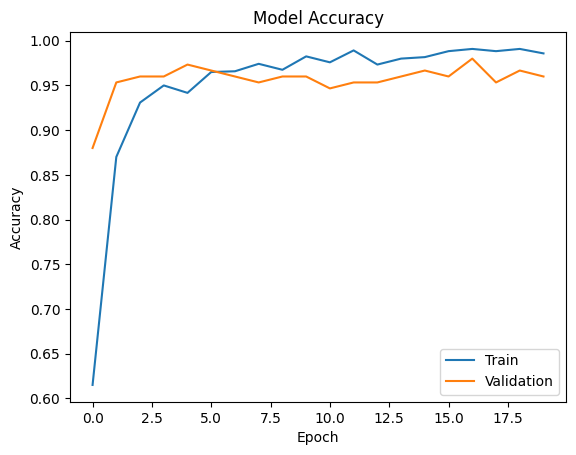

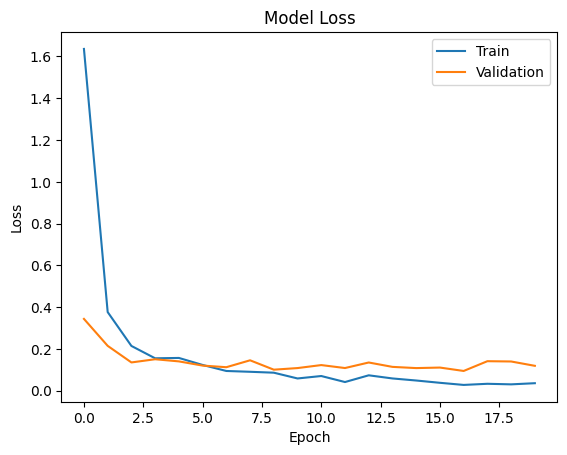

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(vgg19.history['accuracy'])
plt.plot(vgg19.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(vgg19.history['loss'])
plt.plot(vgg19.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

5/5 [==============================] - 1s 154ms/step


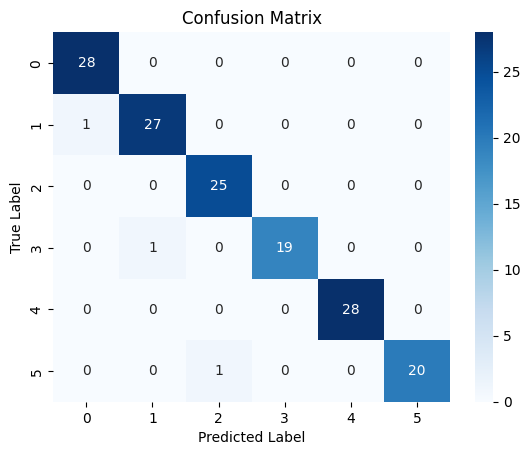

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

# Get predicted labels
y_pred = model3.predict(x_test)

# Convert one-hot encoded labels to class indices
y_test_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_indices, y_pred_indices)

# Visualize confusion matrix
classes = unique_labels(y_test_indices, y_pred_indices)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model3.save('vgg19_model.h5')